In [1]:
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('../styles_and_utils/graphstyle.mplstyle')

import sys
sys.path.insert(1, '../')
from styles_and_utils import *

In [2]:
# pandas
import pandas as pd
def df2np(df, data, model):
    if data == 17:
        df = df[(df['Model'] == model) & (df['Data in k'] == 17)].iloc[0,3::2]
    if data == 35:
        df = df[(df['Model'] == model) & (df['Data in k'] == 35)].iloc[0,2::2]
    return df.to_numpy().astype(float)

# Load validation histories
knee_df = pd.read_excel('val_hist.xlsx')

data = 35
knee35_unt_008M = df2np(knee_df, data, 'U-Net-8M')
knee35_unt_031M = df2np(knee_df, data, 'U-Net-31M')
knee35_unt_124M = df2np(knee_df, data, 'U-Net-124M')

knee35_vit_008M = df2np(knee_df, data, 'ViT-8M/10')
knee35_vit_032M = df2np(knee_df, data, 'ViT-32M/10')


# Load validation histories
knee_df = pd.read_excel('val_hist.xlsx')

data = 17
knee17_unt_008M = df2np(knee_df, data, 'U-Net-8M')
knee17_unt_031M = df2np(knee_df, data, 'U-Net-31M')
knee17_unt_124M = df2np(knee_df, data, 'U-Net-124M')

knee17_vit_008M = df2np(knee_df, data, 'ViT-8M/10')
knee17_vit_032M = df2np(knee_df, data, 'ViT-32M/10')

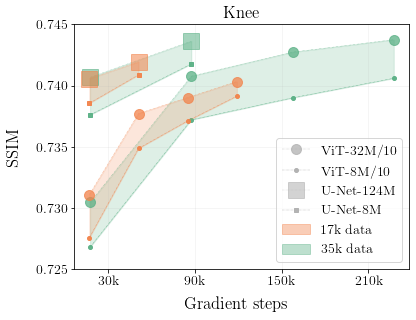

In [15]:
fig, ax = plt.subplots()
""" Model styles """
vits = ViT('s')
vitm = ViT('m')
vitl = ViT('l')

unts = Unet('s')
untm = Unet('m')
untl = Unet('l')

""" Knee """
# 35k data
grad_steps_35k = [17.5, 52.5, 87.5, 122.5, 157.5, 192.5, 227.5] # every 10 epochs starting from 5
color1 = '#5ab085'
alpha = 0.2
ax.plot([                 ], [                  ], vitl.marker, markersize=vitl.ms, alpha=vitl.oc, color=color1, zorder=6)
ax.plot(grad_steps_35k[::2], knee35_vit_032M[::2], vitm.marker, markersize=vitm.ms, alpha=vitm.oc, color=color1, zorder=5)
ax.plot(grad_steps_35k[::2], knee35_vit_008M[::2], vits.marker, markersize=vits.ms, alpha=vits.oc, color=color1, zorder=4)
ax.plot(grad_steps_35k[::2], knee35_unt_124M[::2], untl.marker, markersize=untl.ms, alpha=untl.oc, color=color1, zorder=3)
ax.plot(grad_steps_35k[::2], knee35_unt_008M[::2], unts.marker, markersize=unts.ms, alpha=unts.oc, color=color1, zorder=1)

ax.fill_between(grad_steps_35k[::2], knee35_unt_124M[::2],  knee35_unt_008M[::2], alpha=alpha, color=color1)
ax.fill_between(grad_steps_35k[::2], knee35_vit_032M[::2],  knee35_vit_008M[::2], alpha=alpha, color=color1)

# 17k data
color2 = '#f2834b'
alpha = 0.2
grad_steps_17k = [17, 34, 51, 68 , 85, 102, 119] # every 10 epochs starting from 10
ax.plot([                 ], [                  ], vitl.marker, markersize=vitl.ms, alpha=vitl.oc, color=color2, zorder=6)
ax.plot(grad_steps_17k[::2], knee17_vit_032M[::2], vitm.marker, markersize=vitm.ms, alpha=vitm.oc, color=color2, zorder=5)
ax.plot(grad_steps_17k[::2], knee17_vit_008M[::2], vits.marker, markersize=vits.ms, alpha=vits.oc, color=color2, zorder=4)
ax.plot(grad_steps_17k[::2], knee17_unt_124M[::2], untl.marker, markersize=untl.ms, alpha=untl.oc, color=color2, zorder=3)
ax.plot(grad_steps_17k[::2], knee17_unt_008M[::2], unts.marker, markersize=unts.ms, alpha=unts.oc, color=color2, zorder=1)

ax.fill_between(grad_steps_17k[::2], knee17_unt_124M[::2],  knee17_unt_008M[::2], alpha=alpha, color=color2)
ax.fill_between(grad_steps_17k[::2], knee17_vit_032M[::2],  knee17_vit_008M[::2], alpha=alpha, color=color2)

ax.set_title('Knee')
ax.set_xticks([30, 90, 150, 210])
ax.set_xticklabels(['30k', '90k', '150k', '210k'])
ax.yaxis.set_ticks(np.arange(0.725, 0.745, 0.005))
ax.set_ylim([0.7250, 0.745])

# Legend
ax.fill_between([], [], [], alpha=2*alpha, color=color2, label='17k data')
ax.fill_between([], [], [], alpha=2*alpha, color=color1, label='35k data')
ax.plot([], [], vitm.marker, markersize=vitm.ms, alpha=vitm.oc, color='#b0b0b0', label = vitm.label, zorder=5)
ax.plot([], [], vits.marker, markersize=vits.ms, alpha=vits.oc, color='#b0b0b0', label = vits.label, zorder=4)
ax.plot([], [], untl.marker, markersize=untl.ms, alpha=untl.oc, color='#b0b0b0', label = untl.label, zorder=3)
ax.plot([], [], unts.marker, markersize=unts.ms, alpha=unts.oc, color='#b0b0b0', label = unts.label, zorder=1)

ax.legend()

fig.supxlabel('Gradient steps', y=-0.01)
fig.supylabel('SSIM', x=-0.03)

fig.savefig('training_study.pdf')